# Littlemore Parish Council LTN questionnaire analysis

## Data collection

Data was collected in October 2021 via distributing paper copies of this questionnaire (TODO: link to questionnaire). Questionnaires were only distributed to those who were in when we knocked on the door then we went round a second time to pick them up. From experience, this gets significantly better engagement than simply dropping the questionnaire through the door with no interaction. 

We decided to not use an online option as 
- easy to brigade (i.e. spam with multiple responses)
- more difficult to get good geographic coverage throughout Littlemore
- not as accessible for older people
- expected lower engagement, with only the most engaged already taking part

Limitations:

- Flats were difficult to do so we have poor coverage here
- We did not have time nor the man power to visit multiple times so there will be a bias to those who are in early evening (5-7pm ish)

## Anonymisation (TODO)

To make it impossible (as far as possible) to not identify individuals from the data. 

Only identifiable data is street name (collected no demographic data like age) so we bundle streets together geographically if there are less than [TODO] responses for a single street. This has been done before this notebook - this notebook works on the anonymised data.

## Notes on specific questions


### Question 2

Raw numbers difficult to use without knowing number of people in household. 

### Question 3 

Unsure if people are filling this in as intented (i.e. missing the "driving" aspect). Should've been more carefully worded. Needed a "don't drive" box. 

### Question 4

A number of people missed this question; placement right at the top of the page made it less obvious?

### Question 5

Where people circled an option for some of the filters, I circled "No opinion" for the blank ones. Kind of regret starting to do this, but kept doing it to be consistent. 

### Question 7 and 8

Some normalisation happened here when transcribing *e.g.*
- "It takes a long time to get to my destination" -> "Longer journeys"
- Mapped a lot of related things to "traffic displacement" 
- Only written "None" if something was written there (normalised, e.g. "Nothing", "I can't see any benefit")

This was to:
- Make it easier and quicker to input, without losing data
- Make it easier to analyse later

### Question 10

A lot of people used this for expanding on Question 8 (problem with LTN) rather than thinking of other solutions. Negatives of the LTN were moved to Question 8 responses. Similar to the free-text fields of Questions 7 and 8, some paraphrasing took place. 

## Bad data

Only spotted a couple of obvious duplicates (same hand writing, same pen, very similar content, same road). These were removed from the data. 

## Missed opportunities

Should've asked:
- number of people in household
- number of cars in household
- age data


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = "data/responses_20211102.csv"

## Clean up column names so don't have to deal with spaces

In [4]:
df = pd.read_csv(data)
df.rename(
    columns={
        "Timestamp": "timestamp",
        "Street or Road Name": "street",
        "Email Address": "email",
        "1: Are you in favour of reducing traffic in Littlemore?": "1_reduce_traffic",
        "2: How many journeys per week do you make - CAR - BEFORE LTN": "2_car_before",
        "2: How many journeys per week do you make - CAR - AFTER LTN": "2_car_after",
        "2: How many journeys per week do you make - MOTORBIKE - BEFORE LTN": "2_motorbike_before",
        "2: How many journeys per week do you make - MOTORBIKE - AFTER LTN": "2_motorbike_after",
        "2: How many journeys per week do you make - VAN - BEFORE LTN": "2_van_before",
        "2: How many journeys per week do you make - VAN - AFTER LTN": "2_van_after",
        "2: How many journeys per week do you make - BUS - BEFORE LTN": "2_bus_before",
        "2: How many journeys per week do you make - BUS - AFTER LTN": "2_bus_after",
        "2: How many journeys per week do you make - FOOT - BEFORE LTN": "2_foot_before",
        "2: How many journeys per week do you make - FOOT - AFTER LTN": "2_foot_after",
        "2: How many journeys per week do you make - WHEELCHAIR etc - BEFORE LTN": "2_wheelchair_before",
        "2: How many journeys per week do you make - WHEELCHAIR etc - AFTER LTN": "2_wheelchair_after",
        "2: How many journeys per week do you make - BIKE - BEFORE LTN": "2_bike_before",
        "2: How many journeys per week do you make - BIKE - AFTER LTN": "2_bike_after",
        "2: How many journeys per week do you make - SCOOTER - BEFORE LTN": "2_scooter_before",
        "2: How many journeys per week do you make - SCOOTER - AFTER LTN": "2_scooter_after",
        "3: If you drive, the reasons for this are:": "3_drive_reasons",
        "4. Overall, the LTN's impact on you has been:": "4_ltn_impact",
        "5. Location of traffic filters: Church Hill Road": "5_filter_church_hill_road",
        "5. Location of traffic filters: Beauchamp Lane": "5_filter_beachamp_lane",
        "5. Location of traffic filters: Littlemore Road": "5_filter_littlemore_road",
        "5. Location of traffic filters: Mayfair Road": "5_filter_mayfair_road",
        "5. Location of traffic filters: Liddell Road": "5_filter_liddell_road",
        "5. Location of traffic filters: Bartholomew Road": "5_filter_bartholomew_road",
        "6: Do you think the current Cowley LTNs should be": "6_ltn_future",
        "7:  What is the biggest benefit of the LTNs?": "7_ltn_benefit",
        "8: What is the biggest problem of the LTNs?": "8_ltn_problem",
        "9: Have you filled in the county's online LTN consultation?": "9_consultation",
        "10. Do you have any other comments or ideas to improve traffic in our area?": "10_traffic_ideas",
    },
    inplace=True,
)
df.head()

,timestamp,email,street,1_reduce_traffic,2_car_before,2_car_after,2_motorbike_before,2_motorbike_after,2_van_before,2_van_after,...,5_filter_littlemore_road,5_filter_mayfair_road,5_filter_liddell_road,5_filter_bartholomew_road,6_ltn_future,7_ltn_benefit,8_ltn_problem,9_consultation,10_traffic_ideas,Unnamed: 33
0,10/14/2021 20:03:40,anna.railton@gmail.com,Marlborough Close,Yes,0,0,0,0,0,0,...,Agree,Agree,Agree,Agree,Kept as is,Road safety and improved air quality,Not enough of them - disconnected from wider p...,Yes,NaN,NaN
1,10/18/2021 18:26:48,chris@smowton.net,Champion Way,Yes,5,5,NaN,NaN,NaN,NaN,...,Remove,No opinion,No opinion,Change,Kept with alterations,Some areas became quieter,Displaced traffic,No,NaN,NaN
2,10/18/2021 18:30:18,chris@smowton.net,Champion Way,NaN,5,5,NaN,NaN,NaN,NaN,...,Remove,No opinion,Remove,Remove,NaN,None,More traffic jams,No,Don't see the point of LTNs; make traffic wors...,NaN
3,10/18/2021 18:31:50,chris@smowton.net,Champion Way,Yes,5,5,0,0,0,0,...,Remove,Change,Change,Remove,Removed,Ride bike safely,Traffic is worse,No,NaN,NaN
4,10/18/2021 18:33:22,chris@smowton.net,Champion Way,Yes,10,10,50,100,0,0,...,Remove,Remove,Agree,Change,Kept with alterations,Nothing,Everything,No,"Make Bartholomew Road timed, e.g. closed 0730-...",NaN


## Add in street level data

In [5]:
streets = pd.read_csv("data/street_data.csv")
deprivation_by_lsoa = pd.read_csv("data/littlemore_deprivation_index_by_lsoa.csv")
littlemore_lsoa_mappings = pd.read_csv("data/littlemore_lsoa_mappings.csv")
streets.head()

,street,count,inside_ltn,borders_ltn,in_littlemore_parish,cul_de_sac,postcode,latitude,longitude,driving_distance_to_ltn_meters
0,Addison Drive,19,1,0,1,0,OX4 3UD,51.726362,-1.218138,338.8
1,Alice Smith Square,95,0,0,1,1,OX4 4NF,51.720830,-1.217460,1197.6
2,Astrop Lane,18,0,0,1,1,OX4 4FW,51.719944,-1.226774,1336.4
3,Bampton Close,30,0,0,1,1,OX4 6NN,51.723830,-1.211400,1807.2
4,Barberi Close,24,0,0,1,1,OX4 4GF,51.721360,-1.221830,1005.5


In [6]:
deprivation_by_lsoa.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01028552,Oxford 016A,E07000178,Oxford,34.019,6262,2,0.249,4095,2,1782,481,1016,285,1034
1,E01028553,Oxford 016B,E07000178,Oxford,30.507,7785,3,0.164,9267,3,1775,376,1124,275,1150
2,E01028554,Oxford 016C,E07000178,Oxford,20.481,13951,5,0.153,10213,4,1389,268,843,278,858
3,E01028555,Oxford 016D,E07000178,Oxford,15.847,18079,6,0.081,19405,6,1544,314,945,285,944


In [7]:
littlemore_lsoa_mappings.head()

,pcd7,pcd8,pcds,dointr,doterm,usertype,oa11cd,lsoa11cd,msoa11cd,ladcd,lsoa11nm,msoa11nm,ladnm,ladnmw
0,OX4 4FW,OX4 4FW,OX4 4FW,201005,NaN,0,E00145477,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
1,OX4 4GG,OX4 4GG,OX4 4GG,201012,NaN,0,E00145477,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
2,OX4 4GQ,OX4 4GQ,OX4 4GQ,201506,NaN,0,E00145465,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
3,OX4 4LD,OX4 4LD,OX4 4LD,198001,NaN,0,E00145474,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN
4,OX4 4LJ,OX4 4LJ,OX4 4LJ,198001,NaN,0,E00145477,E01028552,E02005955,E07000178,Oxford 016A,Oxford 016,Oxford,NaN


Join some of these columns to get deprivation index in `streets` dataframe

In [8]:
postcodes = pd.merge(
    littlemore_lsoa_mappings[["pcd7", "lsoa11cd"]],
    deprivation_by_lsoa[["LSOA code (2011)", "Overall Index of Multiple Deprivation (IMD) Score"]],
    left_on="lsoa11cd",
    right_on="LSOA code (2011)",
)
postcodes.drop("LSOA code (2011)", axis=1, inplace=True)
postcodes.rename(
    columns={
        "pcd7": "postcode",
        "lsoa11cd": "lsoa",
        "Overall Index of Multiple Deprivation (IMD) Score": "imd_score",
    },
    inplace=True,
)
postcodes.head()

,postcode,lsoa,imd_score
0,OX4 4FW,E01028552,34.019
1,OX4 4GG,E01028552,34.019
2,OX4 4GQ,E01028552,34.019
3,OX4 4LD,E01028552,34.019
4,OX4 4LJ,E01028552,34.019


Merge with streets data

In [9]:
streets.merge(postcodes, left_on="postcode", right_on="postcode")
streets.head()

,street,count,inside_ltn,borders_ltn,in_littlemore_parish,cul_de_sac,postcode,latitude,longitude,driving_distance_to_ltn_meters
0,Addison Drive,19,1,0,1,0,OX4 3UD,51.726362,-1.218138,338.8
1,Alice Smith Square,95,0,0,1,1,OX4 4NF,51.720830,-1.217460,1197.6
2,Astrop Lane,18,0,0,1,1,OX4 4FW,51.719944,-1.226774,1336.4
3,Bampton Close,30,0,0,1,1,OX4 6NN,51.723830,-1.211400,1807.2
4,Barberi Close,24,0,0,1,1,OX4 4GF,51.721360,-1.221830,1005.5


Merge with full data

In [10]:
df = pd.merge(df, streets, how="left", on="street")
df.columns

Index(['timestamp', 'email', 'street', '1_reduce_traffic', '2_car_before',
       '2_car_after', '2_motorbike_before', '2_motorbike_after',
       '2_van_before', '2_van_after', '2_bus_before', '2_bus_after',
       '2_foot_before', '2_foot_after', '2_wheelchair_before',
       '2_wheelchair_after', '2_bike_before', '2_bike_after',
       '2_scooter_before', '2_scooter_after', '3_drive_reasons',
       '4_ltn_impact', '5_filter_church_hill_road', '5_filter_beachamp_lane',
       '5_filter_littlemore_road', '5_filter_mayfair_road',
       '5_filter_liddell_road', '5_filter_bartholomew_road', '6_ltn_future',
       '7_ltn_benefit', '8_ltn_problem', '9_consultation', '10_traffic_ideas',
       'Unnamed: 33', 'count', 'inside_ltn', 'borders_ltn',
       'in_littlemore_parish', 'cul_de_sac', 'postcode', 'latitude',
       'longitude', 'driving_distance_to_ltn_meters'],
      dtype='object')

## Proportions of streets covered

In [11]:
freq_count_by_street = df["street"].value_counts().to_frame().reset_index()
freq_count_by_street = freq_count_by_street.rename(columns={"street": "count", "index": "street"})

In [12]:
coverage = pd.merge(streets, freq_count_by_street, how="left", on=["street"]).rename(
    columns={"count_x": "total", "count_y": "num_responses"}
)
coverage["coverage"] = 100 * coverage["num_responses"] / coverage["total"]
coverage[coverage["coverage"].notna()].sort_values(by=["coverage"], ascending=False)[
    ["street", "total", "num_responses", "coverage"]
]

,street,total,num_responses,coverage
22,Fairlie Road,16,14.0,87.500000
38,Long Wall,12,10.0,83.333333
56,Sandford Road,17,12.0,70.588235
50,Pipley Furlong,17,11.0,64.705882
14,Compass Close,14,9.0,64.285714
59,Spring Lane,35,22.0,62.857143
18,Dudgeon Drive,34,21.0,61.764706
55,Redmoor Close,15,9.0,60.000000
20,Elm Tree Close,10,6.0,60.000000
6,Broadfields,53,31.0,58.490566


In [13]:
coverage[coverage["num_responses"].isna()].sort_values(by=["coverage"], ascending=False)[
    ["street", "total", "num_responses", "coverage"]
]

,street,total,num_responses,coverage
0,Addison Drive,19,NaN,NaN
7,Brocklesby Road,18,NaN,NaN
17,Denny Gardens,48,NaN,NaN
19,Eastern Avenue,64,NaN,NaN
21,Faber Close,8,NaN,NaN
23,Giles Close,11,NaN,NaN
24,Giles Road,63,NaN,NaN
25,Goodey Close,16,NaN,NaN
27,Gwyneth Road,35,NaN,NaN
28,Hardings Close,16,NaN,NaN


In [14]:
set(freq_count_by_street["street"]).difference(
    set(coverage[coverage["num_responses"].notna()]["street"])
)  # Street names we can't deal with

{'Herschel Crescent', 'Sandy Lane West '}

# Clean up data from question 2 🛠️

- Where we have data like `1-2`, replace with average of two values
- Other strings, replace with `1` to indicate non-negative usage

In [21]:
def average_usage_range(input_: str) -> float:
    if isinstance(input_, str) and "-" in input_:
        bottom, top = input_.split("-")
        return (int(bottom) + int(top)) / 2
    return input_


list(map(average_usage_range, ["5-10", "NaN", "5", "Yes"]))

[7.5, 'NaN', '5', 'Yes']

In [22]:
def get_zeros(input_: str) -> float:
    if isinstance(input_, str) and "0" in input_:
        return 0
    return input_


list(
    map(
        get_zeros,
        ["0 (moved in before LTN)", "(0 because moved in after installation)", "5", "Yes"],
    )
)

[0, 0, '5', 'Yes']

In [23]:
def drop_reason(input_: str) -> float:
    if isinstance(input_, str) and " (" in input_:
        try:
            return float(input_.split(" (")[0])
        except ValueError:
            pass

    return input_


list(map(drop_reason, ["0 (moved in before LTN)", "5 (taxi)", "2.0 (COVID)", "Yes", "5"]))

[0.0, 5.0, 2.0, 'Yes', '5']

In [24]:
def drop_modifiers(input_: str):
    """i.e. <, > and + signs"""
    if isinstance(input_, str):
        for modifier in ["<", ">", "+"]:
            if modifier in input_:
                try:
                    return float(input_.replace(modifier, ""))  # assuming only one modifier exists
                except ValueError:
                    input_.replace(modifier, "")
    return input_


list(map(drop_modifiers, ["<10", "10+", ">10", "5 (taxi)", "2.0 (COVID)", "Yes", "5"]))

[10.0, 10.0, 10.0, '5 (taxi)', '2.0 (COVID)', 'Yes', '5']

In [25]:
list_of_columns_to_clean = [
    "2_car_before",
    "2_car_after",
    "2_motorbike_before",
    "2_motorbike_after",
    "2_van_before",
    "2_van_after",
    "2_bus_before",
    "2_bus_after",
    "2_foot_before",
    "2_foot_after",
    "2_wheelchair_before",
    "2_wheelchair_before",
    "2_bike_before",
    "2_bike_after",
    "2_scooter_before",
    "2_scooter_after",
]

for col_name in list_of_columns_to_clean:
    df[col_name] = (
        df[col_name]
        .apply(average_usage_range)
        .apply(get_zeros)
        .apply(drop_reason)
        .apply(drop_modifiers)
    )

df[["2_car_before", "2_car_after"]]

,2_car_before,2_car_after
0,0,0
1,5,5
2,5,5
3,5,5
4,0,0
...,...,...
520,multiple,multiple with more miles and time
521,9,9
522,14,14
523,14,14


## Create some extra travel mode columns

- `active_travel_before` and `active_travel_after` (float): sum of any active travel indicated, where active travel = [walk, bike, wheelchair, scooter]
- `car_change` (float): different in car use before -> after LTN installation
- `active_travel_change` (float): different in active travel use before/after LTN installation

In [26]:
df["car_change"] = df["2_car_after"].apply(pd.to_numeric, errors="coerce") - df[
    "2_car_before"
].apply(pd.to_numeric, errors="coerce")
df[["2_car_before", "2_car_after", "car_change"]]

,2_car_before,2_car_after,car_change
0,0,0,0.0
1,5,5,0.0
2,5,5,0.0
3,5,5,0.0
4,0,0,0.0
...,...,...,...
520,multiple,multiple with more miles and time,NaN
521,9,9,0.0
522,14,14,0.0
523,14,14,0.0


In [27]:
df["active_travel_before"] = (
    df["2_foot_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_wheelchair_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_bike_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_scooter_before"].apply(pd.to_numeric, errors="coerce").fillna(0)
)
df["active_travel_after"] = (
    df["2_foot_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_wheelchair_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_bike_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
    + df["2_scooter_after"].apply(pd.to_numeric, errors="coerce").fillna(0)
)
df["active_travel_change"] = df["active_travel_after"] - df["active_travel_before"]
df[["active_travel_before", "active_travel_after", "active_travel_change"]]

,active_travel_before,active_travel_after,active_travel_change
0,2.0,16.0,14.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,2.0
4,1.0,3.0,2.0
...,...,...,...
520,0.0,0.0,0.0
521,3.0,3.0,0.0
522,0.0,0.0,0.0
523,0.0,0.0,0.0


## Let's look at some active travel 🚴 🛴 🚶

In [28]:
# Households with zero active travel journeys before LTN installation
sum(df["active_travel_before"] == 0.0)

288

In [29]:
# Households with postive active travel journeys before LTN
sum(df["active_travel_before"] > 0.0)

237

In [30]:
# Households with zero active travel journeys after LTN installation
sum(df["active_travel_after"] == 0.0)

283

In [31]:
# Households with positive active travel journeys after LTN installation
sum(df["active_travel_after"] > 0.0)

242

In [32]:
# Number of households with a positive active travel change
sum(df["active_travel_change"] > 0)

47

In [33]:
# Number of households with a negative active travel change
sum(df["active_travel_change"] < 0)

20

In [34]:
# Number of households nonzero active travel with no change
sum((df["active_travel_change"] == 0) & (df["active_travel_before"] > 0))

185

In [35]:
# Average size of active travel positive change
df["active_travel_change"][df["active_travel_change"] > 0].mean()

5.042553191489362

In [36]:
# Households with modal shift form cars to active travel
sum((df["active_travel_change"] > 0) & (df["car_change"] < 0))

22

## Should probably look at buses a bit 🚌

In [37]:
df["bus_change"] = df["2_bus_after"].apply(pd.to_numeric, errors="coerce") - df[
    "2_bus_before"
].apply(pd.to_numeric, errors="coerce")
df[["2_bus_before", "2_bus_after", "bus_change"]]

,2_bus_before,2_bus_after,bus_change
0,0,0,0.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,0,0,0.0
4,0,0,0.0
...,...,...,...
520,multiple,multiple,NaN
521,NaN,NaN,NaN
522,NaN,NaN,NaN
523,NaN,NaN,NaN


In [38]:
pd.reset_option("^display.", silent=True)

In [39]:
# Number of households with a positive bus use change
sum(df["bus_change"] > 0)

10

In [40]:
# Number of households with a negative bus use change
sum(df["bus_change"] < 0)

8

## Now scooters 🛴

In [43]:
# Scooter use before LTN (and before Voi scooter docks installed)
sum(df["2_scooter_before"].apply(pd.to_numeric, errors="coerce") > 0)

3

In [44]:
# Scooter use after LTN (and after Voi scooter docks installed)
sum(df["2_scooter_after"].apply(pd.to_numeric, errors="coerce") > 0)

6

## Question 1 - "Do you agree with reducing traffic in Littlemore?"# There has to be a better way of doing this

In [45]:
# There has to be a better way of doing this
good_index_order = (
    df.groupby("cul_de_sac")["1_reduce_traffic"]
    .value_counts(dropna=False, normalize=True)[1.0]
    .index
)
good_index_order

Index(['Yes', 'No', 'No opinion', nan], dtype='object', name='1_reduce_traffic')

In [46]:
df.groupby("cul_de_sac")["1_reduce_traffic"].value_counts(dropna=False, normalize=True)[0.0][
    good_index_order
]

1_reduce_traffic
Yes           0.575342
No            0.223744
No opinion    0.095890
NaN           0.105023
Name: 1_reduce_traffic, dtype: float64

In [57]:
# Split on LTN future
conditions = [
    (df["6_ltn_future"] == "Kept as is") | (df["6_ltn_future"] == "Kept with alterations"),
    (df["6_ltn_future"] == "Removed"),
    (df["6_ltn_future"] == "Don't know"),
]
values = ["Keep", "Remove", "Neutral"]
df["6_ltn_future_simple"] = np.select(conditions, values)
ltn_future = df.groupby("6_ltn_future_simple")["1_reduce_traffic"].value_counts(
    dropna=False, normalize=True
)

# Split on active travel
conditions = [
    (df["active_travel_after"] > 0.0),
    (df["active_travel_after"] == 0.0),
]
values = ["Uses active travel", "No active travel"]
df["active_travel_simple"] = np.select(conditions, values)
active_travel = df.groupby("active_travel_simple")['1_reduce_traffic'].value_counts(
    dropna=False, normalize=True
)

# Split on living in cul-de-sac
cul_de_sac = df.groupby("cul_de_sac")["1_reduce_traffic"].value_counts(dropna=False, normalize=True)

results = {
    "All": pd.DataFrame(df["1_reduce_traffic"].value_counts(dropna=False, normalize=True))[
        "1_reduce_traffic"
    ][good_index_order].tolist(),
    "Wants to remove LTN": ltn_future["Remove"][good_index_order].tolist(),
    "Wants to keep LTN": ltn_future["Keep"][good_index_order].tolist(),
    "Neutral on LTN future": ltn_future["Neutral"][good_index_order].tolist(),
    "No active travel": active_travel["No active travel"][good_index_order].tolist(),
    "Uses active travel": active_travel["Uses active travel"][good_index_order].tolist(),
    "Lives in cul-de-sac": cul_de_sac[1.0][good_index_order].tolist(),
    "Doesn't live in cul-de-sac": cul_de_sac[0.0][good_index_order].tolist(),
}
# Convert to percentages
results = {k: list(map(lambda x: x * 100, v)) for k, v in results.items()}
results

{'All': [51.8095238095238,
  28.000000000000004,
  10.095238095238095,
  10.095238095238095],
 'Wants to remove LTN': [33.670033670033675,
  43.09764309764309,
  11.11111111111111,
  12.121212121212121],
 'Wants to keep LTN': [83.4319526627219,
  7.6923076923076925,
  5.325443786982249,
  3.5502958579881656],
 'Neutral on LTN future': [64.0, 4.0, 28.000000000000004, 4.0],
 'No active travel': [44.522968197879855,
  31.802120141342755,
  9.89399293286219,
  13.780918727915195],
 'Uses active travel': [60.33057851239669,
  23.553719008264462,
  10.330578512396695,
  5.785123966942149],
 'Lives in cul-de-sac': [47.50830564784053,
  32.55813953488372,
  10.631229235880399,
  9.30232558139535],
 "Doesn't live in cul-de-sac": [57.534246575342465,
  22.37442922374429,
  9.58904109589041,
  10.50228310502283]}

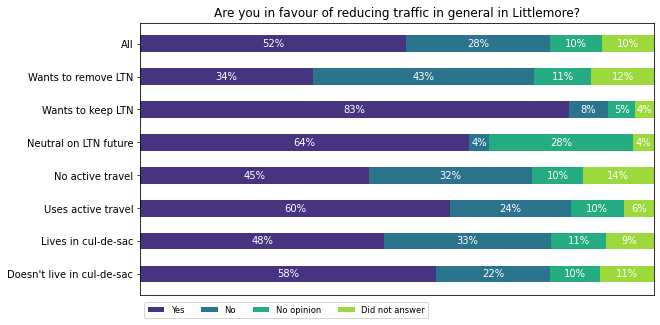

In [59]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap()(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)

        r, g, b, _ = color
        text_color = "white" if r * g * b < 0.5 else "darkgrey"
        ax.bar_label(rects, label_type="center", color=text_color, fmt="%.0f%%")
    # ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc="lower left", fontsize="small")
    ax.legend(
        ncol=len(category_names), bbox_to_anchor=(0, -0.1), loc="lower left", fontsize="small"
    )

    return fig, ax


category_names = ["Yes", "No", "No opinion", "Did not answer"]
survey(results, category_names)
plt.title("Are you in favour of reducing traffic in general in Littlemore?")
plt.savefig("img/1_reducing_traffic.png", bbox_inches="tight")
plt.show()

In [56]:
conditions = [
    (df["active_travel_after"] > 0.0),
    (df["active_travel_after"] == 0.0),
]
values = ["Use active travel", "No active travel"]
df["active_travel_simple"] = np.select(conditions, values)
active_travel = df.groupby("active_travel_simple")['1_reduce_traffic'].value_counts(
    dropna=False, normalize=True
)
active_travel

active_travel_simple  1_reduce_traffic
No active travel      Yes                 0.445230
                      No                  0.318021
                      NaN                 0.137809
                      No opinion          0.098940
Use active travel     Yes                 0.603306
                      No                  0.235537
                      No opinion          0.103306
                      NaN                 0.057851
Name: 1_reduce_traffic, dtype: float64